## Predict Gold Price
- This project's main objective is to generate a machine learning model to predict the price of gold based on various features provided by the kaggle website.
- (Este projeto tem como objetivo principal gerar um modelo de machine learning para predizer o preço do ouro baseado em várias características fornecidas pelo site do kaggle.)

- Dataset: https://www.kaggle.com/datasets/franciscogcc/financial-data/data
The data is a time series dataset with financial info for some market indices, commodities, economic indicators and forex rates. Market indices and commodities are represented via the respective exchange traded fund. It includes values from 2010 to 2024.
- (Os dados são um conjunto de dados de séries temporais com informações financeiras para alguns índices de mercado, commodities, indicadores econômicos e taxas de câmbio. Os índices de mercado e commodities são representados por meio do respectivo fundo negociado em bolsa. Inclui valores de 2010 a 2024.)

In [107]:
# maximiza nro de linhas e colunas para exibição
# inibe mensagens de warning
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import warnings
warnings.simplefilter('ignore')

In [108]:
# preparação e visualização de dados
# pandas, pandas_datareader, numpy e matplotlib
import numpy as np
#import pandas as pd
import pandas_datareader.data as web

from matplotlib import pyplot
from pandas.plotting import scatter_matrix
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from pandas.plotting import scatter_matrix
from statsmodels.graphics.tsaplots import plot_acf

In [109]:
# carregando arquivo de dados da qualidade do ar
df_gold = pd.read_csv('dataset/financial_regression.csv', sep=',')

In [110]:
# verificando o tamanho do arquivo conferindo a quantidade de linhas(registros) e colunas(varáveis)
df_gold.shape

(3904, 47)

In [111]:
# reconhecendo as variáveis disponíveis
df_gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3904 entries, 0 to 3903
Data columns (total 47 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                3904 non-null   object 
 1   sp500 open          3719 non-null   float64
 2   sp500 high          3719 non-null   float64
 3   sp500 low           3719 non-null   float64
 4   sp500 close         3719 non-null   float64
 5   sp500 volume        3719 non-null   float64
 6   sp500 high-low      3719 non-null   float64
 7   nasdaq open         3719 non-null   float64
 8   nasdaq high         3719 non-null   float64
 9   nasdaq low          3719 non-null   float64
 10  nasdaq close        3719 non-null   float64
 11  nasdaq volume       3719 non-null   float64
 12  nasdaq high-low     3719 non-null   float64
 13  us_rates_%          176 non-null    float64
 14  CPI                 176 non-null    float64
 15  usd_chf             3694 non-null   float64
 16  eur_us

Verificamos que até a coluna 14 não existe nenhuma linha com nulos e que existem alguns campos que precisam ser removidos, por exemplo os 2 últimos serão eliminados do dataframe por possuirem somente valores nulos, vamos analisar mais a fundo cada um deles verificando a necessidade de modificar o tipo de dados.

In [112]:
# reconhecendo os dados do dataframe
df_gold.head(5)

,date,sp500 open,sp500 high,sp500 low,sp500 close,sp500 volume,sp500 high-low,nasdaq open,nasdaq high,nasdaq low,nasdaq close,nasdaq volume,nasdaq high-low,us_rates_%,CPI,usd_chf,eur_usd,GDP,silver open,silver high,silver low,silver close,silver volume,silver high-low,oil open,oil high,oil low,oil close,oil volume,oil high-low,platinum open,platinum high,platinum low,platinum close,platinum volume,platinum high-low,palladium open,palladium high,palladium low,palladium close,palladium volume,palladium high-low,gold open,gold high,gold low,gold close,gold volume
0,2010-01-14,114.49,115.14,114.42,114.93,115646960.0,0.72,46.26,46.520,46.22,46.39,75209000.0,0.300,NaN,NaN,1.0206,1.4478,NaN,18.58,18.70,18.45,18.66,69804.0,0.25,39.30,39.4400,38.88,39.06,8575821.0,0.5600,160.13,161.85,159.7200,161.45,228500.0,2.1300,43.93,45.02,43.86,44.84,364528.0,1.16,111.51,112.37,110.79,112.03,18305238.0
1,2010-01-15,114.73,114.84,113.20,113.64,212252769.0,1.64,46.46,46.550,45.65,45.85,126849300.0,0.900,NaN,NaN,1.0264,1.4376,NaN,18.54,18.54,18.36,18.41,205106.0,0.18,38.97,39.0200,38.28,38.40,12615299.0,0.7400,160.68,161.25,159.5000,160.25,189900.0,1.7500,45.18,45.76,44.40,45.76,442210.0,1.36,111.35,112.01,110.38,110.86,18000724.0
2,2010-01-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-01-19,113.62,115.13,113.59,115.06,138671890.0,1.54,45.96,46.640,45.95,46.59,84388200.0,0.690,NaN,NaN,1.0340,1.4269,NaN,18.53,18.79,18.50,18.79,130552.0,0.29,38.07,38.9499,38.03,38.93,8180157.0,0.9199,162.23,165.20,162.1722,165.12,295900.0,3.0278,46.01,47.08,45.70,46.94,629150.0,1.38,110.95,111.75,110.83,111.52,10467927.0
4,2010-01-20,114.28,114.45,112.98,113.89,216330645.0,1.47,46.27,46.604,45.43,45.92,145680000.0,1.174,NaN,NaN,1.0453,1.4094,NaN,18.31,18.31,17.78,17.86,230907.0,0.53,38.23,38.3500,37.88,37.89,11438685.0,0.4700,163.51,163.51,159.0900,163.22,438200.0,4.4200,46.59,47.31,45.17,47.05,643198.0,2.14,109.97,110.05,108.46,108.94,17534231.0


As duas últimas colunas, como já mencionado, possuem valores nulos e serão eliminadas do dataframe, as demais colunas apresentam dados de data, hora e valores numéricos.

In [113]:
# verificando e confirmando se existe algum campo nulo no dataframe
df_gold.isnull().sum()

date                     0
sp500 open             185
sp500 high             185
sp500 low              185
sp500 close            185
sp500 volume           185
sp500 high-low         185
nasdaq open            185
nasdaq high            185
nasdaq low             185
nasdaq close           185
nasdaq volume          185
nasdaq high-low        185
us_rates_%            3728
CPI                   3728
usd_chf                210
eur_usd                210
GDP                   3847
silver open            185
silver high            185
silver low             185
silver close           185
silver volume          185
silver high-low        185
oil open               185
oil high               185
oil low                185
oil close              185
oil volume             185
oil high-low           185
platinum open          185
platinum high          185
platinum low           185
platinum close         185
platinum volume        185
platinum high-low      185
palladium open         185
p

Mesmo que não tenha aparecido nenhum nulo utilizando a função .info() faz-se necessário confirmar se realmente não tem nulos e fizemos isso com a função .isnull().sum() somando as ocorrências de valores nulos que existem no dataframe.

In [114]:
# apagando as colunas que possuem excesso de nulos
df_gold = df_gold.drop('us_rates_%', axis=1)
df_gold = df_gold.drop('CPI', axis=1)
df_gold = df_gold.drop('GDP', axis=1)

In [115]:
# apagando todas as linhas que possuem valores nulos
df_gold = df_gold.dropna()

Nesse caso apagamos as linhas, com nulos, pois todas as colunas apresentaram campos nulos em algum momento.

In [116]:
# verificando a duplicidade de alguma linha
df_gold.duplicated().sum()

0

In [117]:
# vamos modificar o tipo de dados de alguns campos conforme o conteúdo de informação contido nos mesmos
df_gold['date'] = df_gold['date'].astype('datetime64[ns]')

A existência de duplicidade pode comprometer os resultados quando treinarmos os modelos de machine learning, além de consumir recursos computacionais desnecessariamente, dessa excluiremos as linhas duplicadas, deixando somente uma ocorrência de cada linha. Nesse caso a soma de linhas duplicadas foi zero.

In [118]:
# verificando e confirmando se existe algum campo nulo no dataframe
df_gold.isnull().sum()

date                  0
sp500 open            0
sp500 high            0
sp500 low             0
sp500 close           0
sp500 volume          0
sp500 high-low        0
nasdaq open           0
nasdaq high           0
nasdaq low            0
nasdaq close          0
nasdaq volume         0
nasdaq high-low       0
usd_chf               0
eur_usd               0
silver open           0
silver high           0
silver low            0
silver close          0
silver volume         0
silver high-low       0
oil open              0
oil high              0
oil low               0
oil close             0
oil volume            0
oil high-low          0
platinum open         0
platinum high         0
platinum low          0
platinum close        0
platinum volume       0
platinum high-low     0
palladium open        0
palladium high        0
palladium low         0
palladium close       0
palladium volume      0
palladium high-low    0
gold open             0
gold high             0
gold low        

In [119]:
# verificando quantos registros sobraram
df_gold.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3677 entries, 0 to 3900
Data columns (total 44 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                3677 non-null   datetime64[ns]
 1   sp500 open          3677 non-null   float64       
 2   sp500 high          3677 non-null   float64       
 3   sp500 low           3677 non-null   float64       
 4   sp500 close         3677 non-null   float64       
 5   sp500 volume        3677 non-null   float64       
 6   sp500 high-low      3677 non-null   float64       
 7   nasdaq open         3677 non-null   float64       
 8   nasdaq high         3677 non-null   float64       
 9   nasdaq low          3677 non-null   float64       
 10  nasdaq close        3677 non-null   float64       
 11  nasdaq volume       3677 non-null   float64       
 12  nasdaq high-low     3677 non-null   float64       
 13  usd_chf             3677 non-null   float64       
 1

In [120]:
# reconhecendo os dados do dataframe
df_gold.head(5)

,date,sp500 open,sp500 high,sp500 low,sp500 close,sp500 volume,sp500 high-low,nasdaq open,nasdaq high,nasdaq low,nasdaq close,nasdaq volume,nasdaq high-low,usd_chf,eur_usd,silver open,silver high,silver low,silver close,silver volume,silver high-low,oil open,oil high,oil low,oil close,oil volume,oil high-low,platinum open,platinum high,platinum low,platinum close,platinum volume,platinum high-low,palladium open,palladium high,palladium low,palladium close,palladium volume,palladium high-low,gold open,gold high,gold low,gold close,gold volume
0,2010-01-14,114.49,115.14,114.42,114.93,115646960.0,0.72,46.26,46.520,46.22,46.39,75209000.0,0.300,1.0206,1.4478,18.58,18.70,18.45,18.66,69804.0,0.25,39.30,39.4400,38.88,39.06,8575821.0,0.5600,160.13,161.85,159.7200,161.45,228500.0,2.1300,43.93,45.02,43.86,44.84,364528.0,1.16,111.51,112.37,110.79,112.03,18305238.0
1,2010-01-15,114.73,114.84,113.20,113.64,212252769.0,1.64,46.46,46.550,45.65,45.85,126849300.0,0.900,1.0264,1.4376,18.54,18.54,18.36,18.41,205106.0,0.18,38.97,39.0200,38.28,38.40,12615299.0,0.7400,160.68,161.25,159.5000,160.25,189900.0,1.7500,45.18,45.76,44.40,45.76,442210.0,1.36,111.35,112.01,110.38,110.86,18000724.0
3,2010-01-19,113.62,115.13,113.59,115.06,138671890.0,1.54,45.96,46.640,45.95,46.59,84388200.0,0.690,1.0340,1.4269,18.53,18.79,18.50,18.79,130552.0,0.29,38.07,38.9499,38.03,38.93,8180157.0,0.9199,162.23,165.20,162.1722,165.12,295900.0,3.0278,46.01,47.08,45.70,46.94,629150.0,1.38,110.95,111.75,110.83,111.52,10467927.0
4,2010-01-20,114.28,114.45,112.98,113.89,216330645.0,1.47,46.27,46.604,45.43,45.92,145680000.0,1.174,1.0453,1.4094,18.31,18.31,17.78,17.86,230907.0,0.53,38.23,38.3500,37.88,37.89,11438685.0,0.4700,163.51,163.51,159.0900,163.22,438200.0,4.4200,46.59,47.31,45.17,47.05,643198.0,2.14,109.97,110.05,108.46,108.94,17534231.0
5,2010-01-21,113.92,114.27,111.56,111.70,344747028.0,2.71,46.06,46.350,45.30,45.49,204939600.0,1.050,1.0426,1.4106,17.82,17.91,17.32,17.38,198067.0,0.59,38.22,38.4100,37.09,37.24,13716561.0,1.3200,161.86,162.50,159.1200,159.79,247600.0,3.3800,46.60,46.98,45.07,45.30,388457.0,1.91,108.48,108.78,106.61,107.37,25747831.0


In [121]:
# listando as variáveis do df_gold
lista_df_gold = list(df_gold.columns)
lista_df_gold = lista_df_gold[1:44] # retira a data (date) da lista
print(lista_df_gold)

['sp500 open', 'sp500 high', 'sp500 low', 'sp500 close', 'sp500 volume', 'sp500 high-low', 'nasdaq open', 'nasdaq high', 'nasdaq low', 'nasdaq close', 'nasdaq volume', 'nasdaq high-low', 'usd_chf', 'eur_usd', 'silver open', 'silver high', 'silver low', 'silver close', 'silver volume', 'silver high-low', 'oil open', 'oil high', 'oil low', 'oil close', 'oil volume', 'oil high-low', 'platinum open', 'platinum high', 'platinum low', 'platinum close', 'platinum volume', 'platinum high-low', 'palladium open', 'palladium high', 'palladium low', 'palladium close', 'palladium volume', 'palladium high-low', 'gold open', 'gold high', 'gold low', 'gold close', 'gold volume']


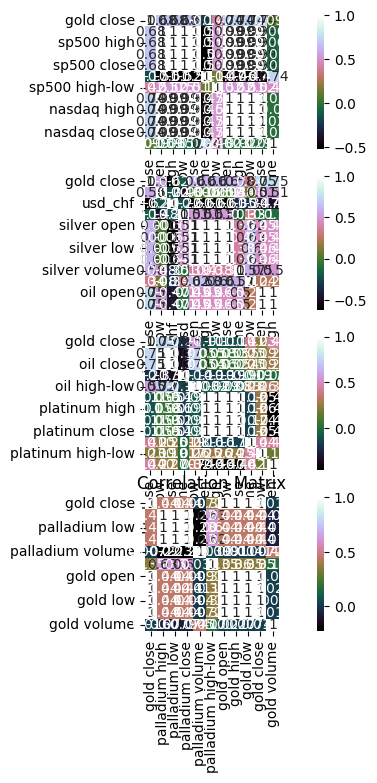

In [148]:
# analisando a correlação entre as variáveis
lista_target = ['gold close']

fig, axs = pyplot.subplots(nrows=4, ncols=1, figsize=(10, 8))

correlation = df_gold.corr(numeric_only=True)
pyplot.title('Correlation Matrix')

inicio=0
fim=11
for i in (0, 1, 2, 3):
    lista_plot = lista_target + lista_df_gold[inicio:fim]
    correlation = df_gold[lista_plot].corr()
    sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='cubehelix', ax=axs[i])

    pyplot.title('Correlation Matrix')

    inicio = inicio + 11
    fim = fim + 11

pyplot.show()